## Test script
File for testing various stuff. Not important.

In [16]:
# Import necessary libraries
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import label as bwlabeln

In [17]:
s_ncPath = '../../NACC_data/sorted_cohorts/NC_simple/'
s_mciPath = '../../NACC_data/sorted_cohorts/MCI_simple/'
s_alzdPath = '../../NACC_data/sorted_cohorts/ALZD_simple/'
s_transPath = '../../NACC_data/sorted_cohorts/TRANS_simple/'

In [18]:
s_ncPath = os.path.abspath(s_ncPath)
s_mciPath = os.path.abspath(s_mciPath)
s_alzdPath = os.path.abspath(s_alzdPath)
s_transPath = os.path.abspath(s_transPath)

In [19]:
if os.name == 'nt':                     
    s_ncPath = '\\\\?\\' + s_ncPath
    s_mciPath = '\\\\?\\' + s_mciPath
    s_alzdPath = '\\\\?\\' + s_alzdPath
    s_transPath = '\\\\?\\' + s_transPath

In [20]:
alzd_nii = []

for folders in os.listdir(s_alzdPath):
    folders_path = os.path.join(s_alzdPath, folders)

    for f in os.listdir(folders_path):

        if f.endswith('.nii'):

            alzd_nii.append(os.path.join(folders_path, f))

In [21]:
print(len(alzd_nii))

101


In [22]:
image1 = nib.load(alzd_nii[0])
image2 = nib.load(alzd_nii[25])
image3 = nib.load(alzd_nii[-1])

image1_data = image1.get_fdata()
image2_data = image2.get_fdata()
image3_data = image3.get_fdata()

In [23]:
print(alzd_nii[0])
print(alzd_nii[25])
print(alzd_nii[-1])

\\?\c:\Users\Crt\Desktop\WIMR\asymmetryAD\NACC_data\sorted_cohorts\ALZD_simple\1018_NACC862393_20161122ni\1.3.12.2.1107.5.2.19.45255.2016112212142985622332873.0.0.0.nii
\\?\c:\Users\Crt\Desktop\WIMR\asymmetryAD\NACC_data\sorted_cohorts\ALZD_simple\mri5171ni\1.2.840.113619.2.207.3596.10291618.19047.1334116235.63.nii
\\?\c:\Users\Crt\Desktop\WIMR\asymmetryAD\NACC_data\sorted_cohorts\ALZD_simple\NACC905292_128401136192134176253428319411240850745981ni\1.2.840.113619.2.134.1762534283.1941.1240850746.100.nii


In [24]:
print(image1_data.shape)
print(image2_data.shape)
print(image3_data.shape)

(192, 240, 256)
(166, 256, 256)
(256, 124, 256)


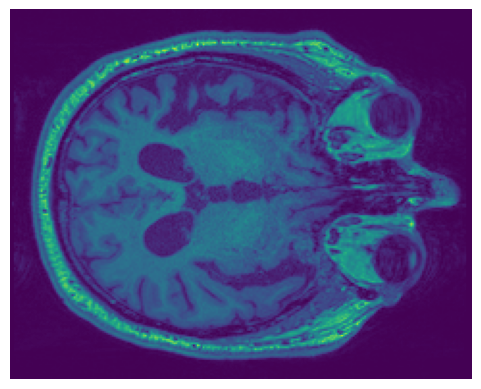

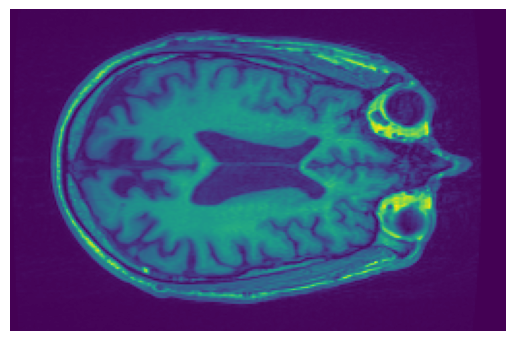

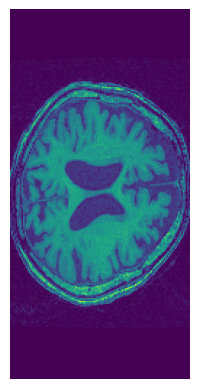

In [25]:
slice_index = image1_data.shape[2] // 2

fig = plt.figure()
plt.imshow(image1_data[:, :, slice_index])
plt.axis('off')
plt.show()

fig = plt.figure()
plt.imshow(image2_data[:, :, slice_index])
plt.axis('off')
plt.show()

fig = plt.figure()
plt.imshow(image3_data[:, :, slice_index])
plt.axis('off')
plt.show()

Mask.

In [26]:
from skimage.transform import resize

In [27]:
mask_txt_file = 'C:/Users/Crt/Desktop/WIMR/asymmetryAD/UW_data/AAL3+pons/AAL3+Pons.txt'
mask_path = 'C:/Users/Crt/Desktop/WIMR/asymmetryAD/UW_data/AAL3+pons/AAL3+pons.nii' 

In [28]:
# Open and read the mask title file
masks_title = []
with open(mask_txt_file, 'r') as f:
    for line in f:
        parts = line.split()                        # Split the line by whitespace
        if len(parts) > 1:                          # Avoid lines that are too short
            masks_title.append(parts[1])            # Take the second column (like data{1, 2} in MATLAB)

# we
masks_title_all = masks_title[:-1]                   # all masks, containing both L and R hemispheres
masks_title_L = masks_title[:-1:2]                   # left side
masks_title_R = masks_title[1::2]                    # right side

In [29]:
mask_image = nib.load(mask_path)

mask_image_data = mask_image.get_fdata()

In [30]:
target_shape = mask_image_data.shape

In [31]:
resized_image1 = resize(image1_data[:, :, slice_index], target_shape)